In [14]:
import torch 
import torchvision
import torchvision.transforms as transforms 
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import numpy as np 
import itertools

In [15]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

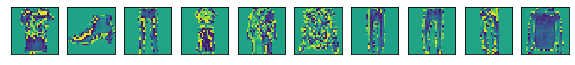

In [16]:
import matplotlib.pyplot as plt
import random
def plot_figs(num_figs = 10):
    trans = transforms.ToPILImage()
    fig, axes = plt.subplots(1, num_figs, figsize=(1 * num_figs, 1))
    num_train = len(trainset)
    random_nums = random.sample(range(num_train), num_figs)
    for i in range(num_figs):
        tmp = trainset[random_nums[i]]
        axes[i].imshow(trans(tmp[0]))
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()
plot_figs(10)

In [17]:
import torch.nn as nn 
import torch.optim as optim

input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                      nn.ReLU(),
                      #nn.Linear(hidden_sizes[1],hidden_sizes[2]),
                      #nn.ReLU(),
                      nn.Linear(hidden_sizes[1],output_size),
                      nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

model.to(device)

optimizer = optim.SGD(model.parameters(),lr= 0.01, momentum = 0.5)

In [18]:
train_losses  = []
test_losses = []

for epoch in range(20):
    running_loss = 0.0
    test_loss = 0.0
    
    for i,data in enumerate(trainloader,0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = model(inputs.view(-1,28*28))#.view, reshpaes data 
        
        l= loss(outputs,labels)
        l.backward()
        
        optimizer.step()
        
        running_loss += l.item()
        
    train_losses = np.append(train_losses,running_loss/len(trainloader))

    for i,data in enumerate (testloader,0):    
        images,labels = data
        outputs = model(images.view(-1,28*28))
        _,predicted= torch.max(outputs.data,1)
        l=loss(outputs, labels)
        test_loss+=l.item()        
        
    test_losses = np.append(test_losses,test_loss/len(testloader))
        
        
    print("[{}], Training Loss: {}".format(epoch + 1, running_loss/len(trainloader)),
         "[{}], Test Loss: {}".format(epoch + 1, test_loss/len(testloader)))
print("Finished")

[1], Training Loss: 0.710140670318085 [1], Test Loss: 0.5098648750782013
[2], Training Loss: 0.45072093855406936 [2], Test Loss: 0.44194201201200484
[3], Training Loss: 0.4009913992938965 [3], Test Loss: 0.44442489549517633
[4], Training Loss: 0.3716977070897881 [4], Test Loss: 0.39487416356801985
[5], Training Loss: 0.3509100096772856 [5], Test Loss: 0.3840005634725094
[6], Training Loss: 0.3341373279770173 [6], Test Loss: 0.3905029085278511
[7], Training Loss: 0.3212440510643825 [7], Test Loss: 0.3827317599952221
[8], Training Loss: 0.3085677972607521 [8], Test Loss: 0.3760641868412495
[9], Training Loss: 0.2976909112701538 [9], Test Loss: 0.3544626286625862
[10], Training Loss: 0.2886377118948871 [10], Test Loss: 0.3449582709372044
[11], Training Loss: 0.2803737227199301 [11], Test Loss: 0.36066842555999756
[12], Training Loss: 0.27206471051647463 [12], Test Loss: 0.35096498355269434
[13], Training Loss: 0.263855691196949 [13], Test Loss: 0.3390268522500992
[14], Training Loss: 0.25

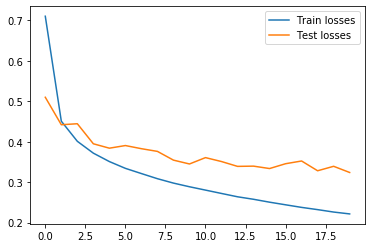

In [19]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.legend()

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.view(-1,28*28))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 88 %


In [21]:
classes = ('T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

In [22]:
@torch.no_grad()
def get_predictions(model,loader):
    all_preds = torch.tensor([])
    for i,batch in enumerate(loader):
        images,labels = batch
        preds = model(images.view(-1,28*28))
        all_preds = torch.cat((all_preds, preds),dim = 0)
    return all_preds

In [23]:
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(trainset, batch_size = 100)
    train_preds = get_predictions(model, prediction_loader)

[[5224    2   61   91   17    1  589    0   15    0]
 [   1 5893    6   74   13    0   12    0    1    0]
 [  52    0 4929   41  581    0  393    0    4    0]
 [  77    6   25 5499  274    0  116    0    3    0]
 [   3    2  211   84 5447    0  251    0    2    0]
 [   0    0    0    0    1 5849    0  123    9   18]
 [ 437    3  207   90  323    0 4927    1   12    0]
 [   0    0    0    0    0   14    0 5891    5   90]
 [  17    1    9    6   33    1   25    4 5904    0]
 [   0    0    0    0    0    6    0  182    8 5804]]


Text(0.5, -20.166445648290726, 'Predicted labels')

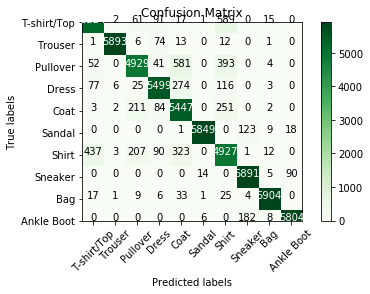

In [24]:
cm = confusion_matrix(trainset.targets,train_preds.argmax(dim=1))
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()    
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

In [25]:
print (classification_report(trainset.targets,train_preds.argmax(dim=1)))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6000
           1       1.00      0.98      0.99      6000
           2       0.90      0.82      0.86      6000
           3       0.93      0.92      0.93      6000
           4       0.81      0.91      0.86      6000
           5       1.00      0.97      0.99      6000
           6       0.78      0.82      0.80      6000
           7       0.95      0.98      0.97      6000
           8       0.99      0.98      0.99      6000
           9       0.98      0.97      0.97      6000

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000

